# ============================================
# NOTEBOOK: 01_exploracion.ipynb
# OBJETIVO: Análisis Exploratorio de German Credit Data
# AUTOR: [Tu nombre]
# FECHA: [Fecha actual]
# ============================================

# # 📊 Exploración de German Credit Data
# 
# ## Objetivo
# Entender la estructura, calidad y patrones del dataset antes de modelar
# 
# ## Contenido
# 1. Carga y primera inspección
# 2. Análisis del target
# 3. Análisis univariado
# 4. Análisis bivariado
# 5. Conclusiones iniciales

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [4]:
# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configurar visualizaciones
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [5]:
# Cargar datos desde formato UCI
# Archivo: german.data (separado por espacios, sin header)

# Nombres de las columnas (según german.doc)
column_names = [
    'checking_status', 'duration', 'credit_history', 'purpose', 
    'credit_amount', 'savings_status', 'employment', 'installment_rate',
    'personal_status', 'other_parties', 'residence_since', 
    'property_magnitude', 'age', 'other_payment_plans', 'housing',
    'existing_credits', 'job', 'num_dependents', 'own_telephone',
    'foreign_worker', 'risk'
]

# Cargar el archivo
df = pd.read_csv('../../german_credit_data/german.data', 
                 sep=' ',              # Separado por espacios
                 header=None,          # Sin nombres de columnas
                 names=column_names)   # Asignar nombres

# Convertir target: 1=Good, 2=Bad → 0=Good, 1=Bad
df['risk'] = df['risk'].map({1: 0, 2: 1})

# ## Primera Inspección

In [5]:
# Vista previa de los primeros registros
print("="*60)
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*60)
df.head()

PRIMERAS 5 FILAS DEL DATASET


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_rate,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [6]:
# Información general del dataset
print("="*60)
print("INFORMACIÓN GENERAL")
print("="*60)
df.info()

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_status      1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings_status       1000 non-null   object
 6   employment           1000 non-null   object
 7   installment_rate     1000 non-null   int64 
 8   personal_status      1000 non-null   object
 9   other_parties        1000 non-null   object
 10  residence_since      1000 non-null   int64 
 11  property_magnitude   1000 non-null   object
 12  age                  1000 non-null   int64 
 13  other_payment_plans  1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null  

In [7]:
# Estadísticas descriptivas de variables numéricas
print("="*60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*60)
df.describe()


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,duration,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents,risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [26]:
# Verificar valores faltantes
print("="*60)
print("VALORES FALTANTES POR COLUMNA")
print("="*60)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje (%)': missing_pct.values
})

missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values(
    'Valores Faltantes', 
    ascending=False
)

if len(missing_df) == 0:
    print("✅ No hay valores faltantes en el dataset")
else:
    print(missing_df.to_string(index=False))

VALORES FALTANTES POR COLUMNA
✅ No hay valores faltantes en el dataset


In [14]:
# Identificar tipos de variables
print("="*60)
print("CLASIFICACIÓN DE VARIABLES")
print("="*60)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Variables Numéricas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")

print(f"\n📝 Variables Categóricas ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")


CLASIFICACIÓN DE VARIABLES

📊 Variables Numéricas (8):
  - duration
  - credit_amount
  - installment_rate
  - residence_since
  - age
  - existing_credits
  - num_dependents
  - risk

📝 Variables Categóricas (13):
  - checking_status
  - credit_history
  - purpose
  - savings_status
  - employment
  - personal_status
  - other_parties
  - property_magnitude
  - other_payment_plans
  - housing
  - job
  - own_telephone
  - foreign_worker


# ## Análisis del Target (Variable Objetivo)

In [15]:
# Vista previa de los primeros registros
print("="*60)
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*60)
df.head()


PRIMERAS 5 FILAS DEL DATASET


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_rate,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [11]:
# Información general del dataset
print("="*60)
print("INFORMACIÓN GENERAL")
print("="*60)
df.info()

INFORMACIÓN GENERAL
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   checking_status      1000 non-null   object
 1   duration             1000 non-null   int64 
 2   credit_history       1000 non-null   object
 3   purpose              1000 non-null   object
 4   credit_amount        1000 non-null   int64 
 5   savings_status       1000 non-null   object
 6   employment           1000 non-null   object
 7   installment_rate     1000 non-null   int64 
 8   personal_status      1000 non-null   object
 9   other_parties        1000 non-null   object
 10  residence_since      1000 non-null   int64 
 11  property_magnitude   1000 non-null   object
 12  age                  1000 non-null   int64 
 13  other_payment_plans  1000 non-null   object
 14  housing              1000 non-null   object
 15  existing_credits     1000 non-null  

In [12]:
# Estadísticas descriptivas de variables numéricas
print("="*60)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*60)
df.describe()

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS


,duration,credit_amount,installment_rate,residence_since,age,existing_credits,num_dependents,risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000


In [13]:
# Verificar valores faltantes
print("="*60)
print("VALORES FALTANTES POR COLUMNA")
print("="*60)

missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Columna': missing.index,
    'Valores Faltantes': missing.values,
    'Porcentaje (%)': missing_pct.values
})

missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values(
    'Valores Faltantes', 
    ascending=False
)

if len(missing_df) == 0:
    print("✅ No hay valores faltantes en el dataset")
else:
    print(missing_df.to_string(index=False))

VALORES FALTANTES POR COLUMNA
✅ No hay valores faltantes en el dataset


In [14]:
# Identificar tipos de variables
print("="*60)
print("CLASIFICACIÓN DE VARIABLES")
print("="*60)

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Variables Numéricas ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  - {col}")

print(f"\n📝 Variables Categóricas ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  - {col}")

CLASIFICACIÓN DE VARIABLES

📊 Variables Numéricas (8):
  - duration
  - credit_amount
  - installment_rate
  - residence_since
  - age
  - existing_credits
  - num_dependents
  - risk

📝 Variables Categóricas (13):
  - checking_status
  - credit_history
  - purpose
  - savings_status
  - employment
  - personal_status
  - other_parties
  - property_magnitude
  - other_payment_plans
  - housing
  - job
  - own_telephone
  - foreign_worker


## Análisis del Target (Variable Objetivo)

# Verificar el nombre de la columna target
# Comúnmente es 'Risk', 'Class', o similar

In [6]:
# Verificar el nombre de la columna target
# Ajustar según tu dataset

# Intentar encontrar la columna target automáticamente
possible_target_names = ['Risk', 'risk', 'target', 'class', 'label']

target_col = None
for name in possible_target_names:
    if name in df.columns:
        target_col = name
        break

# Si no se encuentra, mostrar columnas y detener
if target_col is None:
    print(f"⚠️ Columna target no encontrada automáticamente.")
    print(f"Columnas disponibles: {df.columns.tolist()}")
    print("\n💡 ACCIÓN REQUERIDA:")
    print("Edita esta celda y asigna manualmente:")
    print("target_col = 'nombre_correcto_aqui'")
    raise ValueError("Target no encontrado. Ver mensaje arriba.")

print(f"✅ Columna target encontrada: '{target_col}'")

✅ Columna target encontrada: 'risk'


In [8]:
# Distribución del target
print("="*60)
print(f"DISTRIBUCIÓN DE {target_col.upper()}")
print("="*60)

target_counts = df[target_col].value_counts()
target_pct = df[target_col].value_counts(normalize=True) * 100

target_summary = pd.DataFrame({
    'Categoría': target_counts.index,
    'Cantidad': target_counts.values,
    'Porcentaje (%)': target_pct.values
})

print(target_summary.to_string(index=False))

# Calcular ratio de desbalanceo
ratio = target_counts.max() / target_counts.min()
print(f"\n⚖️ Ratio de desbalanceo: {ratio:.2f}:1")

if ratio > 1.5:
    print("⚠️ Dataset desbalanceado - considerar técnicas de balanceo")
else:
    print("✅ Dataset relativamente balanceado")

DISTRIBUCIÓN DE RISK
 Categoría  Cantidad  Porcentaje (%)
         0       700            70.0
         1       300            30.0

⚖️ Ratio de desbalanceo: 2.33:1
⚠️ Dataset desbalanceado - considerar técnicas de balanceo


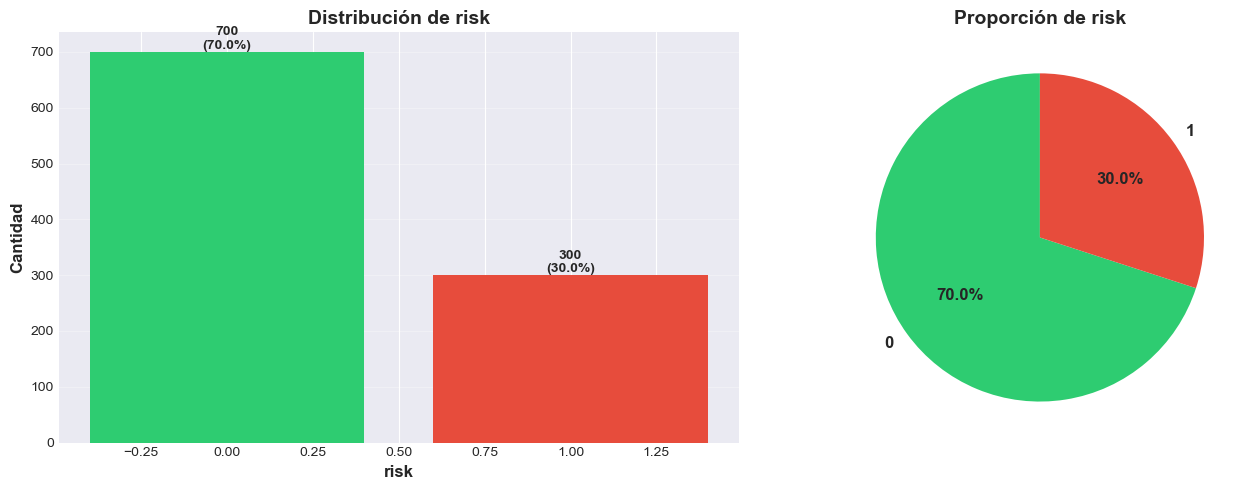

In [9]:
# Visualización del target
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
axes[0].bar(target_counts.index, target_counts.values, color=['#2ecc71', '#e74c3c'])
axes[0].set_xlabel(target_col, fontsize=12, fontweight='bold')
axes[0].set_ylabel('Cantidad', fontsize=12, fontweight='bold')
axes[0].set_title(f'Distribución de {target_col}', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for i, (cat, val) in enumerate(target_counts.items()):
    axes[0].text(i, val + 5, f'{val}\n({target_pct.values[i]:.1f}%)', 
                ha='center', fontweight='bold')

# Gráfico de torta
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%',
           colors=colors, startangle=90, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title(f'Proporción de {target_col}', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ## Análisis Univariado - Variables Numéricas

In [16]:
# Remover el target de las variables numéricas si está incluido
numeric_features = [col for col in numeric_cols if col != target_col]

print("="*60)
print(f"ANÁLISIS DE {len(numeric_features)} VARIABLES NUMÉRICAS")
print("="*60)

ANÁLISIS DE 7 VARIABLES NUMÉRICAS


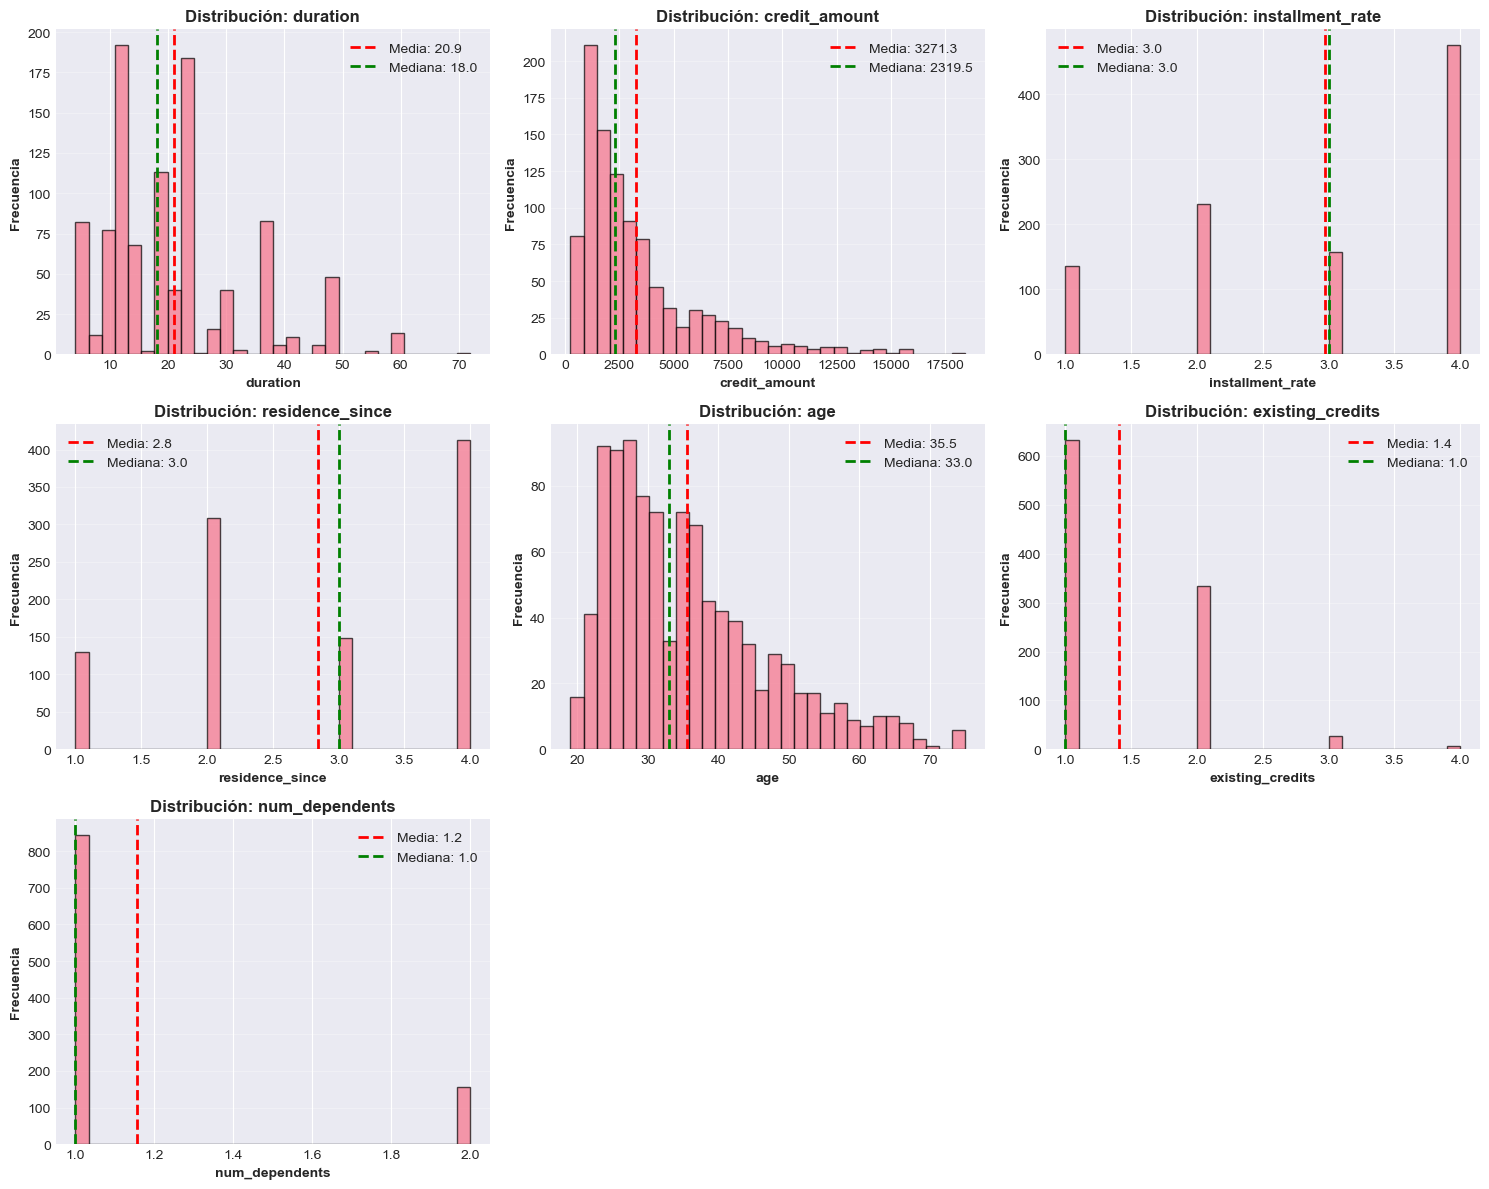

In [17]:
# Distribuciones de variables numéricas
n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes]

for idx, col in enumerate(numeric_features):
    ax = axes[idx]
    
    # Histograma con KDE
    ax.hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    ax.set_xlabel(col, fontweight='bold')
    ax.set_ylabel('Frecuencia', fontweight='bold')
    ax.set_title(f'Distribución: {col}', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    # Añadir estadísticas
    mean_val = df[col].mean()
    median_val = df[col].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.1f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.1f}')
    ax.legend()

# Ocultar ejes vacíos si los hay
for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

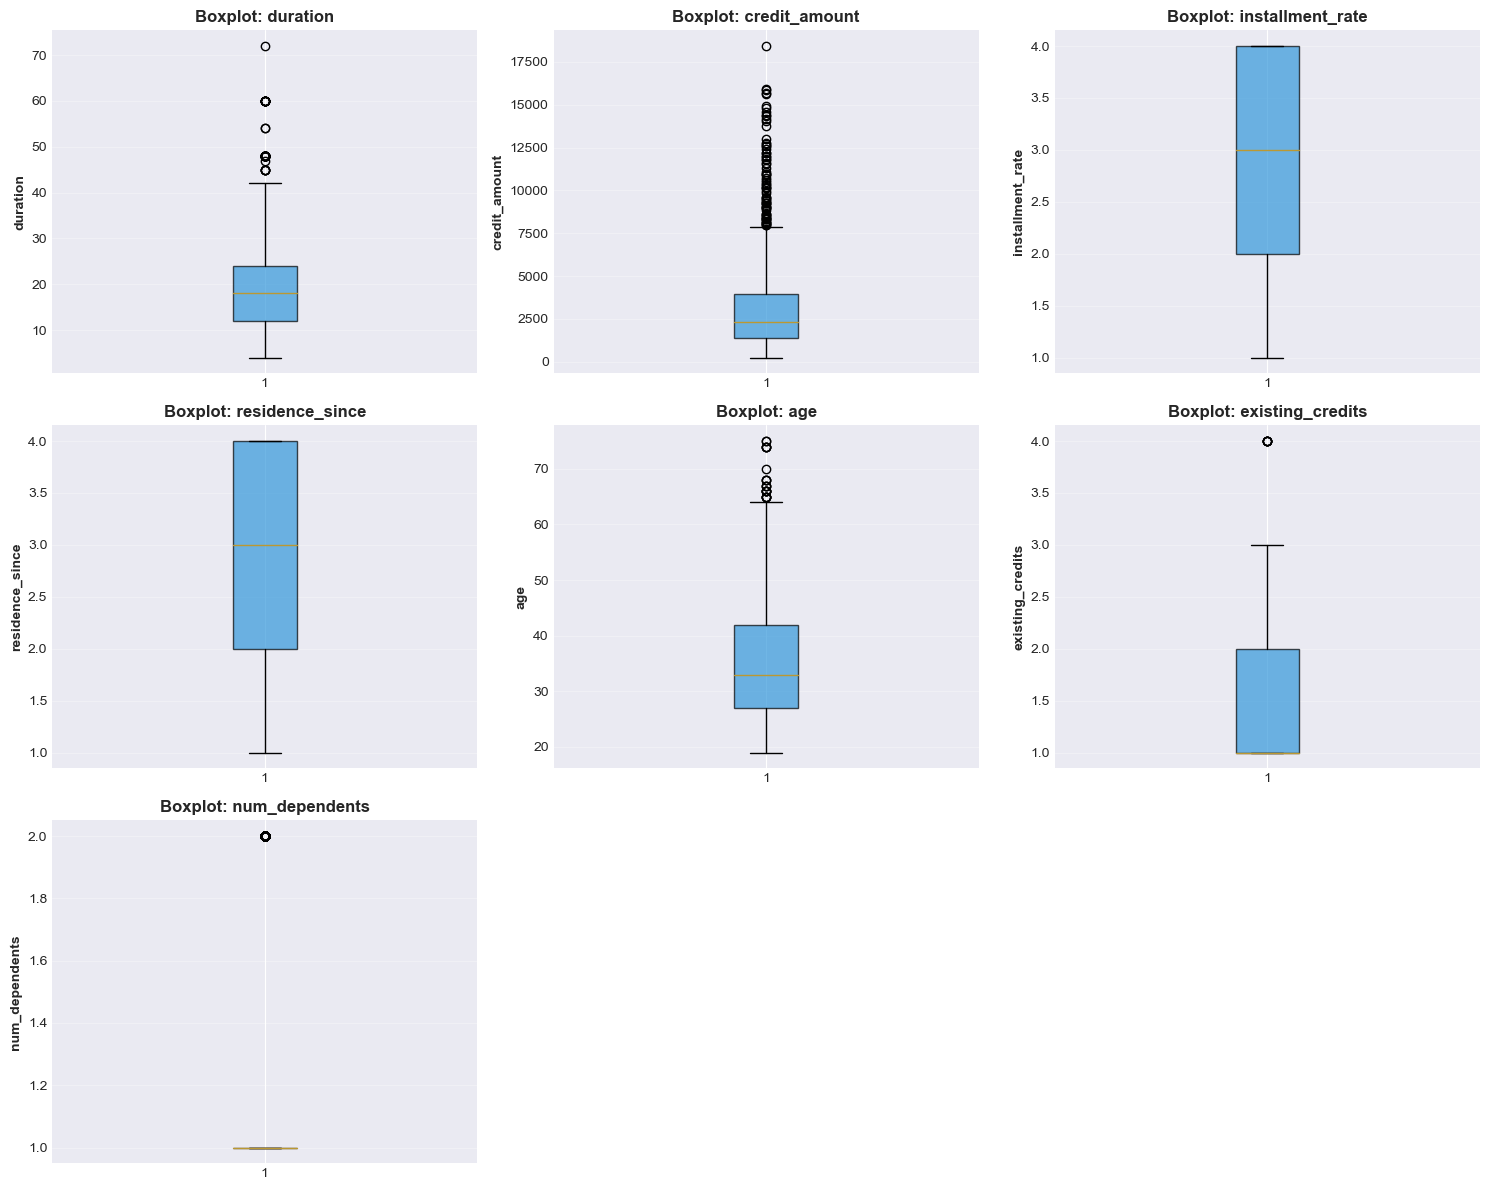

In [18]:
# Detección de outliers usando boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten() if n_rows > 1 else [axes]

for idx, col in enumerate(numeric_features):
    ax = axes[idx]
    
    # Boxplot
    bp = ax.boxplot(df[col].dropna(), vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('#3498db')
    bp['boxes'][0].set_alpha(0.7)
    
    ax.set_ylabel(col, fontweight='bold')
    ax.set_title(f'Boxplot: {col}', fontweight='bold')
    ax.grid(axis='y', alpha=0.3)

# Ocultar ejes vacíos
for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# ## Análisis Univariado - Variables Categóricas

In [19]:
# Remover el target de las categóricas si está incluido
categorical_features = [col for col in categorical_cols if col != target_col]

print("="*60)
print(f"ANÁLISIS DE {len(categorical_features)} VARIABLES CATEGÓRICAS")
print("="*60)


ANÁLISIS DE 13 VARIABLES CATEGÓRICAS


In [20]:
# Frecuencias de variables categóricas
for col in categorical_features:
    print(f"\n{'='*60}")
    print(f"VARIABLE: {col.upper()}")
    print(f"{'='*60}")
    
    freq = df[col].value_counts()
    freq_pct = df[col].value_counts(normalize=True) * 100
    
    freq_df = pd.DataFrame({
        'Categoría': freq.index,
        'Cantidad': freq.values,
        'Porcentaje (%)': freq_pct.values
    })
    
    print(freq_df.to_string(index=False))
    print(f"\nCategorías únicas: {df[col].nunique()}")


VARIABLE: CHECKING_STATUS
Categoría  Cantidad  Porcentaje (%)
      A14       394            39.4
      A11       274            27.4
      A12       269            26.9
      A13        63             6.3

Categorías únicas: 4

VARIABLE: CREDIT_HISTORY
Categoría  Cantidad  Porcentaje (%)
      A32       530            53.0
      A34       293            29.3
      A33        88             8.8
      A31        49             4.9
      A30        40             4.0

Categorías únicas: 5

VARIABLE: PURPOSE
Categoría  Cantidad  Porcentaje (%)
      A43       280            28.0
      A40       234            23.4
      A42       181            18.1
      A41       103            10.3
      A49        97             9.7
      A46        50             5.0
      A45        22             2.2
      A44        12             1.2
     A410        12             1.2
      A48         9             0.9

Categorías únicas: 10

VARIABLE: SAVINGS_STATUS
Categoría  Cantidad  Porcentaje (%)
      A

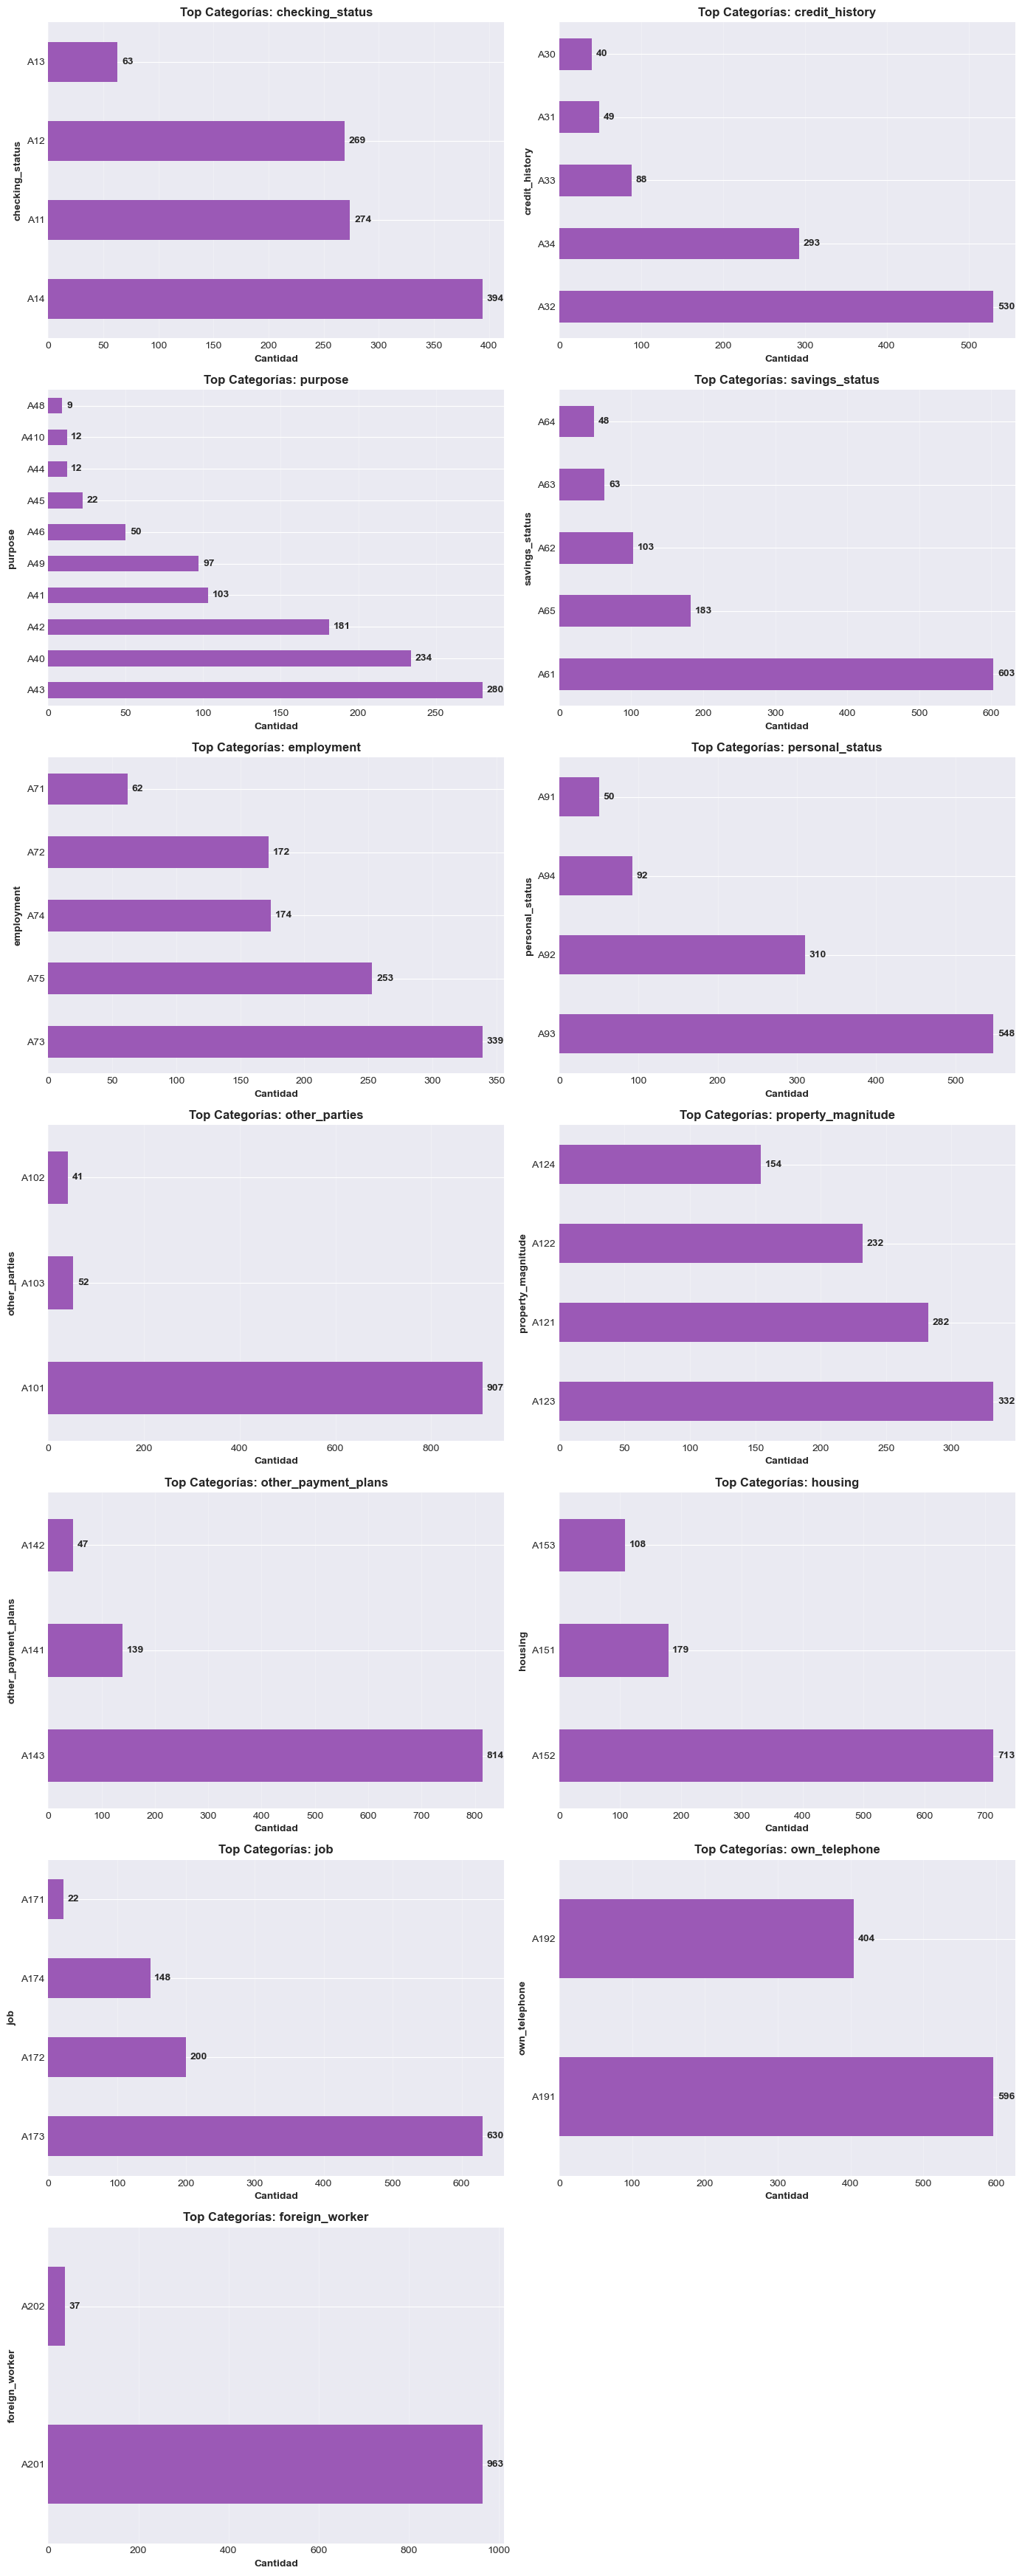

In [21]:
# Visualización de variables categóricas
n_cols_cat = 2
n_rows_cat = (len(categorical_features) + n_cols_cat - 1) // n_cols_cat

fig, axes = plt.subplots(n_rows_cat, n_cols_cat, figsize=(14, n_rows_cat * 5))
axes = axes.flatten() if n_rows_cat > 1 else [axes]

for idx, col in enumerate(categorical_features):
    ax = axes[idx]
    
    # Contar frecuencias
    freq = df[col].value_counts().head(10)  # Top 10 categorías
    
    # Gráfico de barras horizontal
    freq.plot(kind='barh', ax=ax, color='#9b59b6')
    ax.set_xlabel('Cantidad', fontweight='bold')
    ax.set_ylabel(col, fontweight='bold')
    ax.set_title(f'Top Categorías: {col}', fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, v in enumerate(freq.values):
        ax.text(v + max(freq) * 0.01, i, str(v), va='center', fontweight='bold')

# Ocultar ejes vacíos
for idx in range(len(categorical_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# ## Análisis Bivariado - Correlaciones

MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS


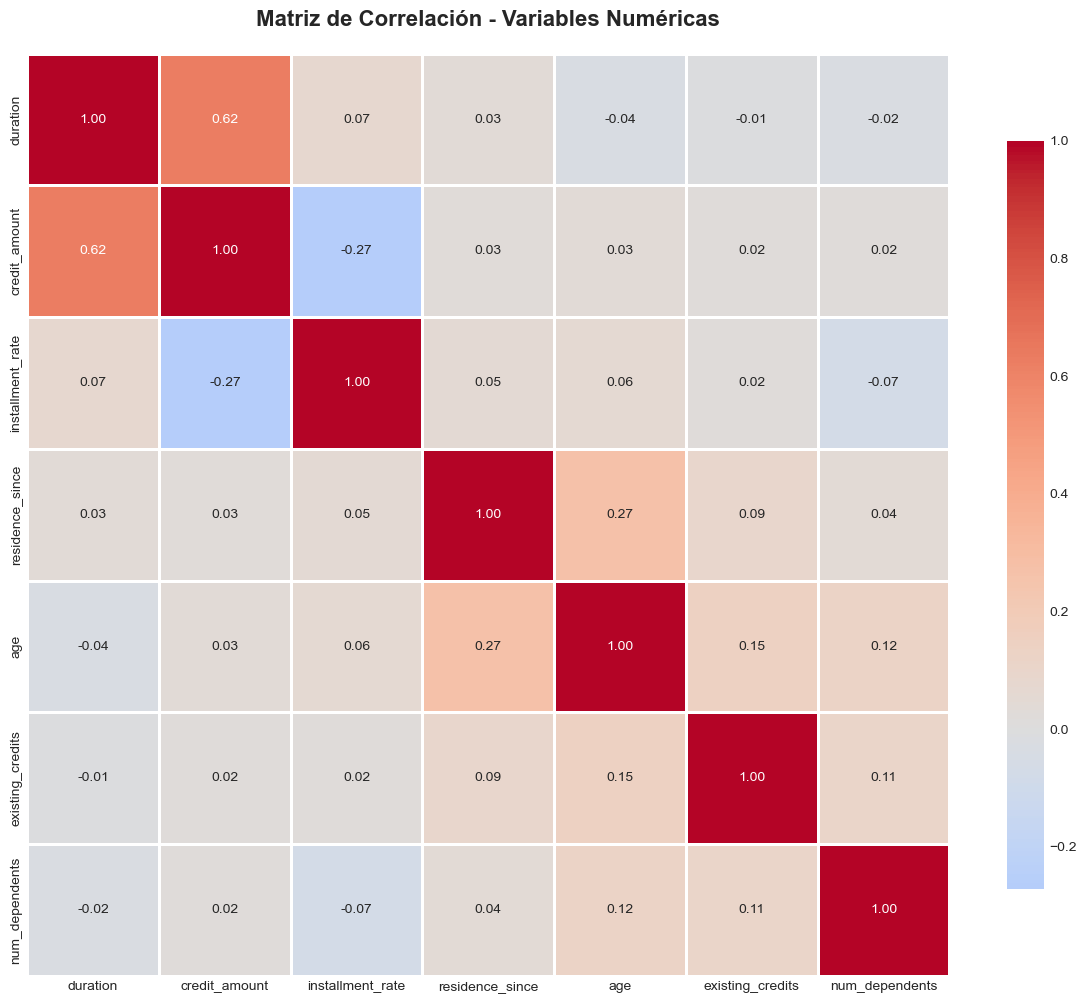

In [22]:
# Matriz de correlación de variables numéricas
print("="*60)
print("MATRIZ DE CORRELACIÓN - VARIABLES NUMÉRICAS")
print("="*60)

# Calcular matriz de correlación
corr_matrix = df[numeric_features].corr()

# Visualización
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Numéricas', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [23]:
# Identificar correlaciones fuertes (|r| > 0.5)
print("\n🔍 CORRELACIONES FUERTES (|r| > 0.5):")
print("="*60)

threshold = 0.5
strong_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            strong_corr.append({
                'Variable 1': corr_matrix.columns[i],
                'Variable 2': corr_matrix.columns[j],
                'Correlación': corr_matrix.iloc[i, j]
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values('Correlación', 
                                                           key=abs, 
                                                           ascending=False)
    print(strong_corr_df.to_string(index=False))
else:
    print("No se encontraron correlaciones fuertes entre variables numéricas")



🔍 CORRELACIONES FUERTES (|r| > 0.5):
Variable 1    Variable 2  Correlación
  duration credit_amount     0.624984


# ## Relación Features vs Target

RELACIÓN VARIABLES NUMÉRICAS VS TARGET


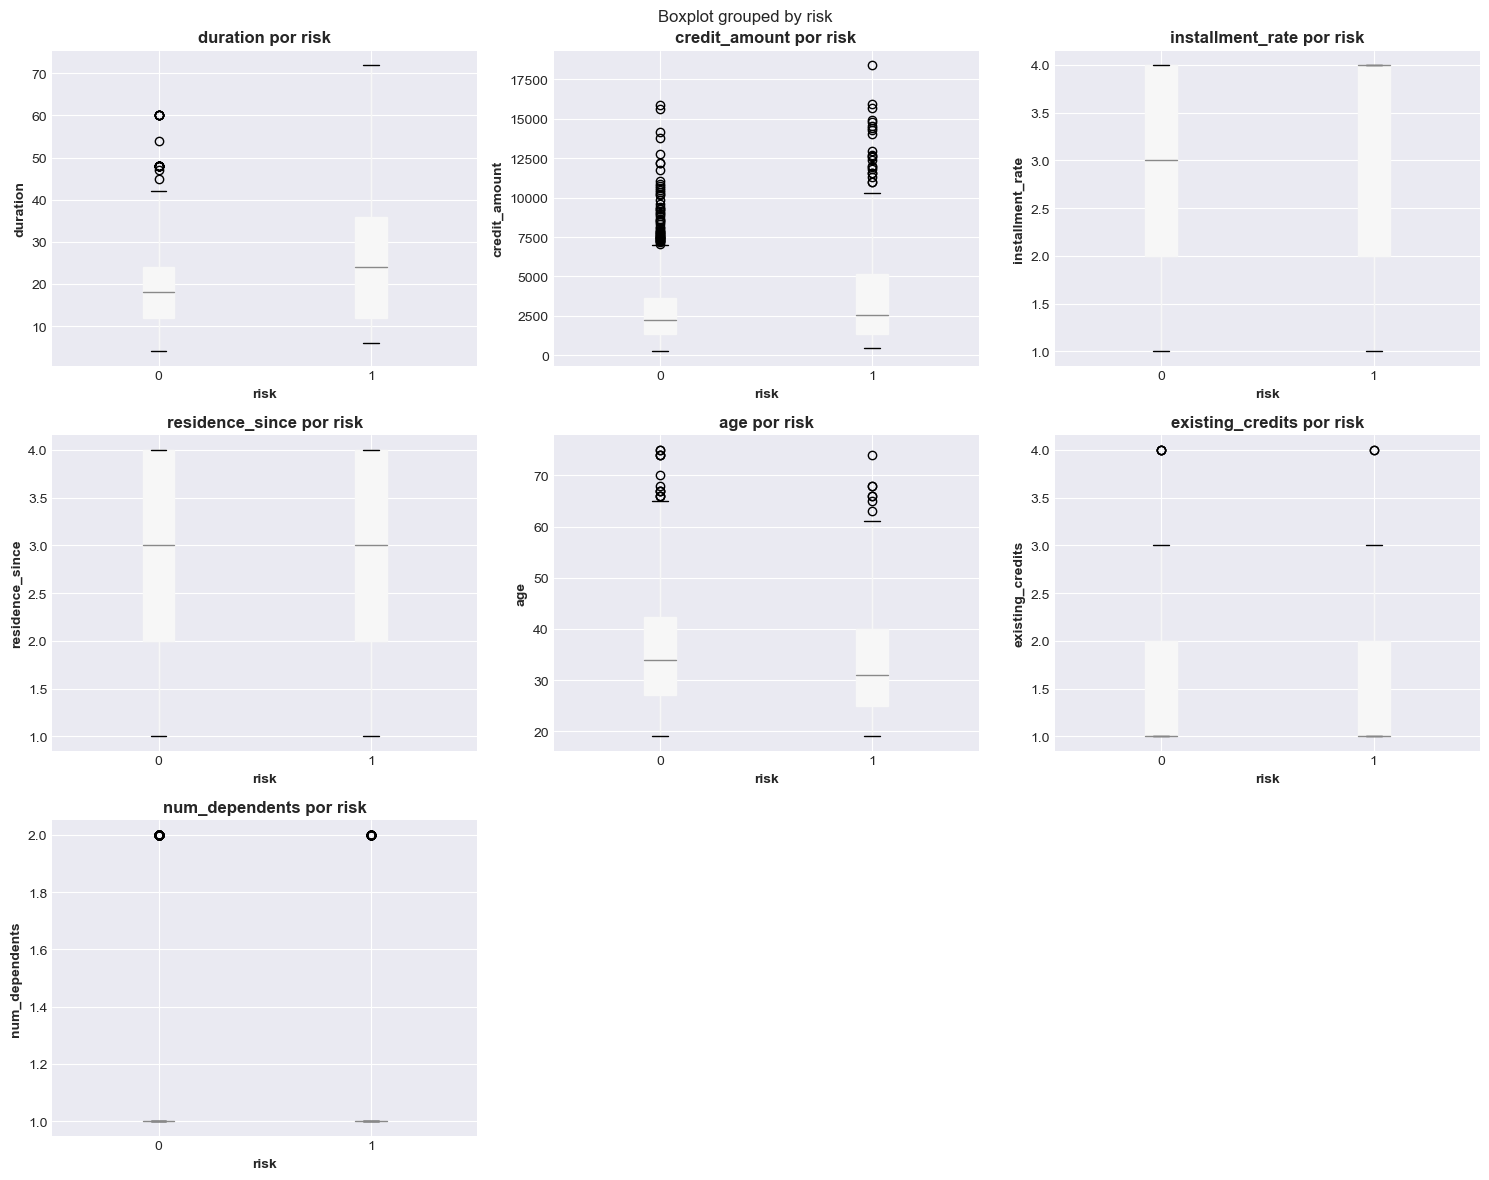

In [24]:
# Análisis de variables numéricas vs target
print("="*60)
print("RELACIÓN VARIABLES NUMÉRICAS VS TARGET")
print("="*60)

# Crear visualizaciones
n_cols_target = 3
n_rows_target = (len(numeric_features) + n_cols_target - 1) // n_cols_target

fig, axes = plt.subplots(n_rows_target, n_cols_target, figsize=(15, n_rows_target * 4))
axes = axes.flatten() if n_rows_target > 1 else [axes]

for idx, col in enumerate(numeric_features):
    ax = axes[idx]
    
    # Boxplot por categoría de target
    df.boxplot(column=col, by=target_col, ax=ax, patch_artist=True)
    ax.set_xlabel(target_col, fontweight='bold')
    ax.set_ylabel(col, fontweight='bold')
    ax.set_title(f'{col} por {target_col}', fontweight='bold')
    plt.sca(ax)
    plt.xticks(rotation=0)

# Ocultar ejes vacíos
for idx in range(len(numeric_features), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


# ## Conclusiones Iniciales

In [27]:
print("="*60)
print("📝 RESUMEN EJECUTIVO - EXPLORACIÓN DE DATOS")
print("="*60)

print(f"""
✅ DATASET CARGADO CORRECTAMENTE
   - Registros: {df.shape[0]}
   - Features: {df.shape[1]}
   
📊 COMPOSICIÓN DEL DATASET
   - Variables numéricas: {len(numeric_features)}
   - Variables categóricas: {len(categorical_features)}
   - Variable target: {target_col}
   
⚖️ BALANCE DE CLASES
   - Ratio: {ratio:.2f}:1
   - Estado: {'Desbalanceado ⚠️' if ratio > 1.5 else 'Balanceado ✅'}
   
🔍 CALIDAD DE DATOS
   - Valores faltantes: {len(missing_df) if len(missing_df) > 0 else 'Ninguno ✅'}
   
🎯 PRÓXIMOS PASOS
   1. Preprocesamiento de datos
   2. Entrenamiento de modelo XGBoost
   3. Implementación de SHAP para interpretabilidad
""")

print("\n✅ Exploración completada exitosamente")
print("📁 Guardar insights para siguiente fase: Modelado")

📝 RESUMEN EJECUTIVO - EXPLORACIÓN DE DATOS

✅ DATASET CARGADO CORRECTAMENTE
   - Registros: 1000
   - Features: 21
   
📊 COMPOSICIÓN DEL DATASET
   - Variables numéricas: 7
   - Variables categóricas: 13
   - Variable target: risk
   
⚖️ BALANCE DE CLASES
   - Ratio: 2.33:1
   - Estado: Desbalanceado ⚠️
   
🔍 CALIDAD DE DATOS
   - Valores faltantes: Ninguno ✅
   
🎯 PRÓXIMOS PASOS
   1. Preprocesamiento de datos
   2. Entrenamiento de modelo XGBoost
   3. Implementación de SHAP para interpretabilidad


✅ Exploración completada exitosamente
📁 Guardar insights para siguiente fase: Modelado
